In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, AdaBoostRegressor, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

from sklearn.svm import LinearSVC, SVC, SVR

pd.options.display.max_columns = 150


In [2]:
df = pd.read_csv('../data/clean_data_dates_dummies.csv')

In [3]:
df.head()

,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,participants,notes,stateresponse,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,startdate,enddate,duration,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Austria,country_Azerbaijan,country_Bahrain,country_Bangladesh,country_Belarus,country_Belgium,country_Benin,country_Bhutan,country_Bolivia,country_Bosnia,country_Botswana,country_Brazil,country_Bulgaria,country_Burkina Faso,country_Burundi,country_Cambodia,country_Cameroon,country_Canada,country_Cape Verde,country_Central African Republic,country_Chad,country_Chile,country_China,country_Colombia,country_Comoros,country_Congo Brazzaville,country_Congo Kinshasa,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,country_Czech Republic,country_Czechoslovakia,country_Denmark,country_Djibouti,country_Dominican Republic,country_Ecuador,country_Egypt,country_El Salvador,country_Equatorial Guinea,country_Eritrea,country_Estonia,country_Ethiopia,country_Finland,country_France,country_Gabon,country_Gambia,country_Georgia,country_Germany,...,country_Serbia and Montenegro,country_Sierra Leone,country_Singapore,country_Slovak Republic,country_Slovenia,country_Somalia,country_South Africa,country_South Korea,country_South Sudan,country_Spain,country_Sri Lanka,country_Sudan,country_Suriname,country_Swaziland,country_Sweden,country_Switzerland,country_Syria,country_Taiwan,country_Tajikistan,country_Tanzania,country_Thailand,country_Timor Leste,country_Togo,country_Tunisia,country_Turkey,country_Turkmenistan,country_USSR,country_Uganda,country_Ukraine,country_United Arab Emirate,country_United Kingdom,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Yugoslavia,country_Zambia,country_Zimbabwe,year_1991,year_1992,year_1993,year_1994,year_1995,year_1996,year_1997,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,region_Asia,region_Central America,region_Europe,region_MENA,region_North America,region_Oceania,region_South America
0,1,15.0,1.0,1990.0,15.0,1.0,1990.0,0.0,3000,Canada s railway passenger system was finally...,ignore,1,0,0,1,0,0,0,19900115000000,19900115000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,25.0,6.0,1990.0,25.0,6.0,1990.0,0.0,1000,protestors were only identified as young peop...,ignore,0,0,0,1,0,0,0,19900625000000,19900625000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1.0,7.0,1990.0,1.0,7.0,1990.0,0.0,500,"THE Queen, after calling on Canadians to rema...",ignore,0,0,0,1,0,0,0,19900701000000,19900701000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,12.0,7.0,1990.0,6.0,9.0,1990.0,1.0,300,Canada s federal government has agreed to acq...,accomodation,0,1,0,0,0,0,0,19900712000000,19900906000000,56,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,5,14.0,

## All features numerical

In [4]:
df['stateresponse_violence'] = df['stateresponse'].map({'accomodation': 0, 'ignore': 0, 'crowd dispersal': 0,
                                                       'arrests': 1, 'beatings': 1, 'shootings': 1, 'killings': 1})

In [5]:
# drop text data
df.drop(columns = 'notes', inplace = True)

In [7]:
df.dtypes

protestnumber               int64
startday                  float64
startmonth                float64
startyear                 float64
endday                    float64
                           ...   
region_MENA                 int64
region_North America        int64
region_Oceania              int64
region_South America        int64
stateresponse_violence      int64
Length: 222, dtype: object

In [6]:
#Feature engineering
df['state_protester_violence'] = df['stateresponse_violence'] * df['protesterviolence']

In [7]:
#How many events with violence have it on both sides?
df['state_protester_violence'].value_counts()

0.0    12566
1.0     1908
Name: state_protester_violence, dtype: int64

In [8]:
df['stateresponse_violence'].value_counts()

0    11215
1     3259
Name: stateresponse_violence, dtype: int64

In [9]:
df['protesterviolence'].value_counts()

0.0    10668
1.0     3806
Name: protesterviolence, dtype: int64

In [10]:
violent_events = 3806 + 3259 - 1908
violent_events

5157

In [11]:
both_violent = 1908 / 5157
both_violent

0.3699825479930192

### Unique events
Protester violence: 1898

State Violence: 1351

Both violence: 1908

no violence: 9317

## EDA

In [12]:
clean = pd.read_csv('../data/clean_data.csv')

In [13]:
clean['stateresponse_violence'] = clean['stateresponse'].map({'accomodation': 0, 'ignore': 0, 'crowd dispersal': 0,
                                                       'arrests': 1, 'beatings': 1, 'shootings': 1, 'killings': 1})

In [14]:
clean['state_protester_violence'] = clean['stateresponse_violence'] * clean['protesterviolence']

In [15]:
both = clean[clean['state_protester_violence'] == 1]

In [16]:
protester = clean[clean['protesterviolence'] == 1]

In [17]:
state = clean[clean['stateresponse_violence'] == 1]

In [22]:
bangladesh = clean[clean['country'] == 'Bangladesh']

In [18]:
both.head()

,country,year,region,protestnumber,startday,startmonth,startyear,endday,endmonth,endyear,protesterviolence,participants,notes,stateresponse,labor wage dispute,land farm issue,police brutality,"political behavior, process","price increases, tax policy",removal of politician,social restrictions,startdate,enddate,duration,stateresponse_violence,state_protester_violence
4,Canada,1990,North America,5,14.0,8.0,1990.0,15.0,8.0,1990.0,1.0,950,Protests were directed against the state due t...,arrests,0,0,0,1,0,0,0,1990-08-14,1990-08-15,1 days 00:00:00.000000000,1,1.0
8,Canada,1992,North America,1,4.0,5.0,1992.0,5.0,5.0,1992.0,1.0,1000,Rioting was in response to the killing of a bl...,arrests,0,0,1,0,0,0,0,1992-05-04,1992-05-05,1 days 00:00:00.000000000,1,1.0
14,Canada,1995,North America,2,8.0,9.0,1995.0,8.0,9.0,1995.0,1.0,300,Ontario provincial police fatally shot an Ind...,killings,0,1,0,0,0,0,0,1995-09-08,1995-09-08,0 days 00:00:00.000000000,1,1.0
21,Canada,2000,North America,4,16.0,6.0,2000.0,16.0,6.0,2000.0,1.0,50,Anti poverty protesters fought with the polic...,arrests,0,0,0,1,0,0,0,2000-06-16,2000-06-16,0 days 00:00:00.000000000,1,1.0
23,Canada,2005,North America,1,3.0,3.0,2005.0,3.0,4.0,2005.0,1.0,170000,The scene on fashionable Rue St. Denis looked...,arrests,0,0,0,1,0,0,0,2005-03-03,2005-04-03,31 days 00:00:00.000000000,1,1.0


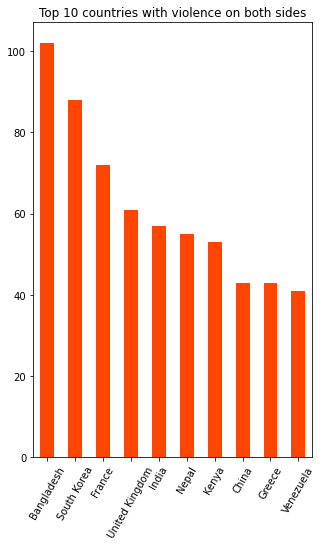

In [21]:
both['country'].value_counts().head(10).plot(kind='bar',figsize=(5 , 8),
                                           title='Top 10 countries with violence on both sides', 
                                            color='orangered')
plt.xticks(rotation=60);

#Bangladesh is 7th in protest amount, but 1st in violence on both sides

In [25]:
bangladesh['stateresponse_violence'].value_counts(normalize=True)

0    0.580357
1    0.419643
Name: stateresponse_violence, dtype: float64

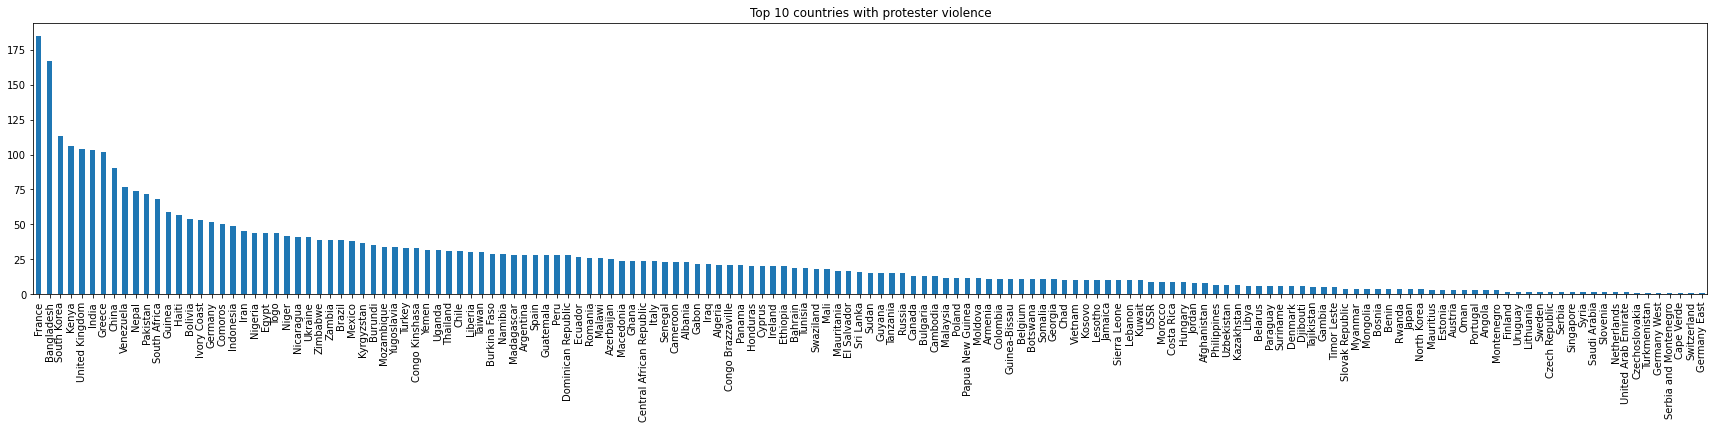

In [30]:
protester['country'].value_counts().head(-5).plot(kind='bar',figsize=(30 , 5),
                                           title='Top 10 countries with protester violence');

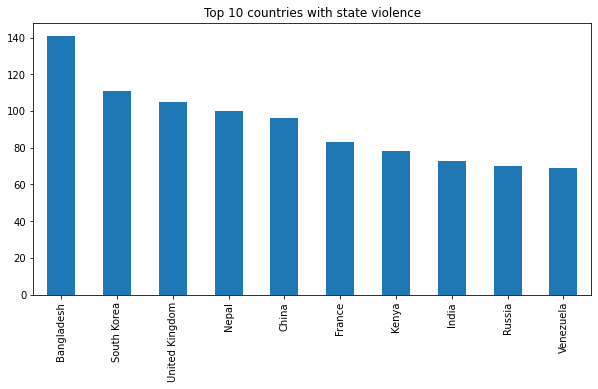

In [23]:
state['country'].value_counts().head(10).plot(kind='bar',figsize=(10 , 5),
                                           title='Top 10 countries with state violence');

In [24]:
both['country'].value_counts(normalize = True)

Bangladesh             0.053459
South Korea            0.046122
France                 0.037736
United Kingdom         0.031971
India                  0.029874
                         ...   
Rwanda                 0.000524
Slovenia               0.000524
Germany West           0.000524
Slovak Republic        0.000524
United Arab Emirate    0.000524
Name: country, Length: 151, dtype: float64

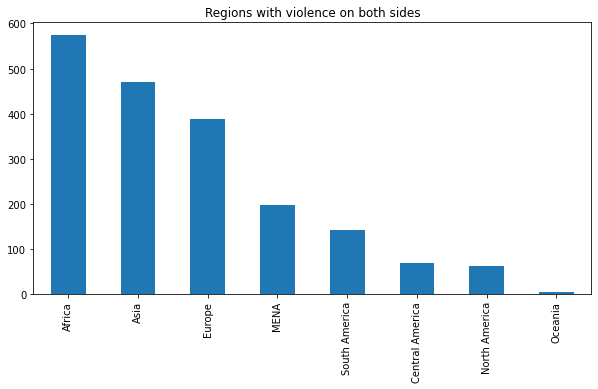

In [25]:
both['region'].value_counts().head(10).plot(kind='bar',figsize=(10 , 5),
                                           title='Regions with violence on both sides');

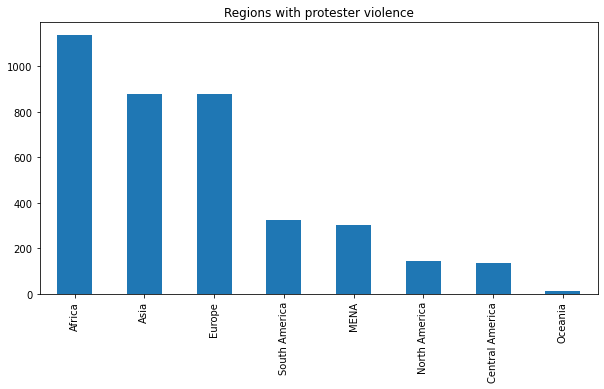

In [26]:
protester['region'].value_counts().head(10).plot(kind='bar',figsize=(10 , 5),
                                           title='Regions with protester violence');

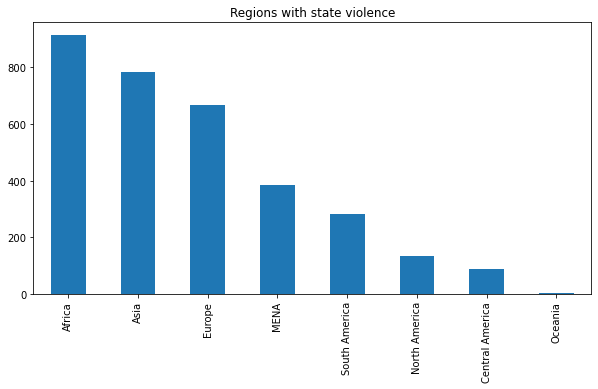

In [27]:
state['region'].value_counts().head(10).plot(kind='bar',figsize=(10 , 5),
                                           title='Regions with state violence')

In [43]:
both['region'].value_counts(normalize = True)

Africa             0.300839
Asia               0.246855
Europe             0.203878
MENA               0.103774
South America      0.073899
Central America    0.035639
North America      0.033019
Oceania            0.002096
Name: region, dtype: float64

In [66]:
bangladesh.shape

(336, 26)

In [67]:
bangladesh['state_protester_violence'].value_counts(normalize=True)

0.0    0.696429
1.0    0.303571
Name: state_protester_violence, dtype: float64

In [68]:
bangladesh['protesterviolence'].value_counts(normalize=True)

0.0    0.502976
1.0    0.497024
Name: protesterviolence, dtype: float64

In [69]:
bangladesh['stateresponse_violence'].value_counts(normalize=True)

0    0.580357
1    0.419643
Name: stateresponse_violence, dtype: float64

In [70]:
africa = clean[clean['region'] == 'Africa']

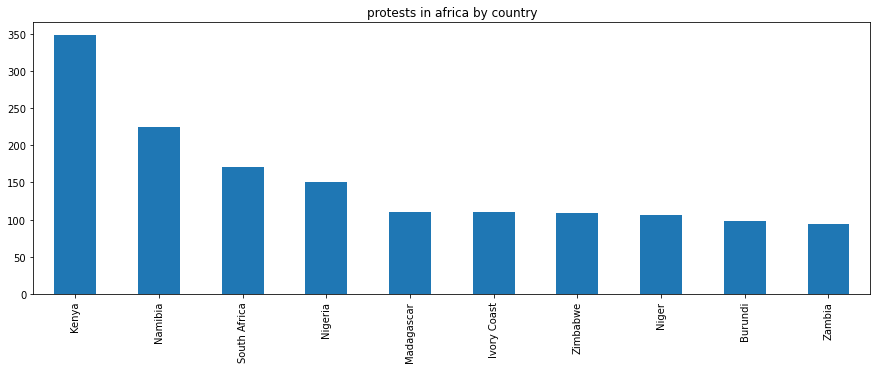

In [71]:
africa['country'].value_counts().head(10).plot(kind='bar',figsize=(15 , 5),
                                           title='protests in africa by country');

### Correlation

In [8]:
df['protesterviolence'].corr(df['stateresponse_violence'])

0.39489971130397167

In [9]:
df['duration'].corr(df['stateresponse_violence'])

0.04893968495489126

In [10]:
df['protesterviolence'].corr(df['duration'])

0.0343713593442654

In [11]:
df['participants'].corr(df['stateresponse_violence'])

-0.016404154625459192

In [12]:
df['participants'].corr(df['protesterviolence'])

-0.02129688948425648

## State Response as target

In [24]:
#baseline accuracy
df['stateresponse_violence'].value_counts(normalize = True)

0    0.774838
1    0.225162
Name: stateresponse_violence, dtype: float64

In [25]:
# Define X and y variables
sr_X = df._get_numeric_data().drop(columns = 'stateresponse_violence')
sr_y = df['stateresponse_violence']

In [26]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(sr_X, sr_y,
                                                   random_state=42)

In [27]:
# Scale
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Ada Boost

In [19]:
ada = AdaBoostClassifier()
ada.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [20]:
print('Train score: ', ada.score(X_train_sc, y_train))
print('Test score: ', ada.score(X_test_sc, y_test))

Train score:  0.804606172270843
Test score:  0.7952473058856038


In [23]:
#Grid search
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

ada_params = {
    'n_estimators': [60, 65, 75,
    'learning_rate': [.9, .8],
    'base_estimator__max_depth': [2, 3, 4]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4)
gs.fit(X_train_sc, y_train)
print('GridSearchCV score ', gs.best_score_)
gs.best_params_

GridSearchCV score  0.805803398631171


{'base_estimator__max_depth': 2, 'learning_rate': 0.8, 'n_estimators': 65}

In [ ]:
#{'base_estimator__max_depth': 2, 'learning_rate': 0.9, 'n_estimators': 50}
#.804

#{'base_estimator__max_depth': 2, 'learning_rate': 0.8, 'n_estimators': 65} CV=4
#.806


In [24]:
print('Train score: ', gs.score(X_train_sc, y_train))
print('Test score: ', gs.score(X_test_sc, y_test))

Train score:  0.8268079226163059
Test score:  0.804642166344294


## Protester Violence as target

### Ada Boost

In [8]:
#Base accuracy
df['protesterviolence'].value_counts(normalize = True)

0.0    0.737046
1.0    0.262954
Name: protesterviolence, dtype: float64

In [9]:
pv_X = df._get_numeric_data().drop(columns = 'protesterviolence')
pv_y = df['protesterviolence']

In [10]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(pv_X, pv_y,
                                                   random_state=42)

In [11]:
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [12]:
ada = AdaBoostClassifier()
ada.fit(X_train_sc, y_train)

AdaBoostClassifier()

In [13]:
print('Train score: ', ada.score(X_train_sc, y_train))
print('Test score: ', ada.score(X_test_sc, y_test))

Train score:  0.8736066328880701
Test score:  0.8632218844984803


In [14]:
#Grid search
ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier())

ada_params = {
    'n_estimators': [120 , 90, 100],
    'learning_rate': [.7, .6, .5],
    'base_estimator__max_depth': [1, 2, 3]
}

gs = GridSearchCV(ada, param_grid=ada_params, cv=4)
gs.fit(X_train_sc, y_train)
print('GridSearchCV score ', gs.best_score_)
gs.best_params_

GridSearchCV score  0.8716715704103255


{'base_estimator__max_depth': 1, 'learning_rate': 0.7, 'n_estimators': 100}

In [15]:
print('Train score: ', gs.score(X_train_sc, y_train))
print('Test score: ', gs.score(X_test_sc, y_test))

Train score:  0.8737908797789037
Test score:  0.8651561204752695
